In [210]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [211]:
boston_dataset = load_boston()

c:\Users\essam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [212]:
# now let's try to use the boston dataset with the same procedure :
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
boston = pd.DataFrame(data,columns=boston_dataset.feature_names)
boston['MEDV'] = target
boston.describe(include = 'all').round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


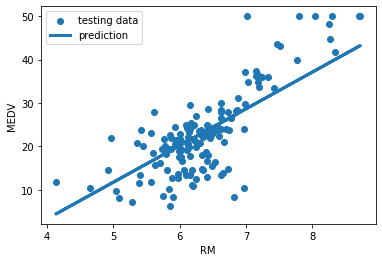

In [213]:
model1 = LinearRegression()

X = boston[['RM']].values
Y = boston['MEDV'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

model1.fit(X_train, Y_train)

y_test_predicted = model1.predict(X_test)

plt.scatter(X_test, Y_test,
label='testing data')

plt.plot(X_test, y_test_predicted,
label='prediction', linewidth=3)

plt.xlabel('RM'); plt.ylabel('MEDV')
plt.legend(loc='upper left')

plt.savefig("boston model.png")
plt.show()

In [214]:
boston[['RM']]

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [215]:
boston[['RM']].values

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

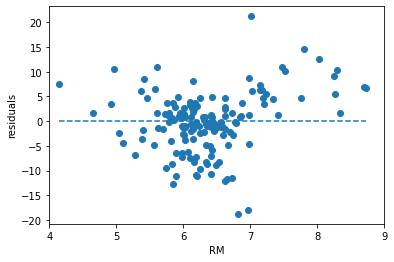

'\nResiduals are scattered around the horizontal line, y = 0, with no particular pattern. \nThis seemingly random distribution is a sign that the model is working. \nIdeally the residuals should be symmetrically and randomly spaced around the horizontal axis; \nif the residual plot shows some pattern, linear or nonlinear, \nthat’s an indication that our model has room for improvement.\n'

In [216]:
#. A residual is the difference between the observed value of the target and the predicted value. The closer the residual is to 0, the better job our model is doing.

residuals = Y_test - y_test_predicted

# plot the residuals
plt.scatter(X_test, residuals)
# plot a horizontal line at y = 0
plt.hlines(y = 0,
xmin = X_test.min(), xmax=X_test.max(),
linestyle='--')
# set xlim
plt.xlim((4, 9))
plt.xlabel('RM'); plt.ylabel('residuals')
plt.savefig("boston residuals plot.png")
plt.show()

"""
Residuals are scattered around the horizontal line, y = 0, with no particular pattern. 
This seemingly random distribution is a sign that the model is working. 
Ideally the residuals should be symmetrically and randomly spaced around the horizontal axis; 
if the residual plot shows some pattern, linear or nonlinear, 
that’s an indication that our model has room for improvement.
"""

In [217]:
#when each residual is near 0 it suggests a good fit. For example, the first five residuals in our model :
print(residuals[:5])

[ 0.82101579 -2.18443719 -3.84935016  2.83673577  6.00265905]


In [218]:
residuals

array([ 8.21015788e-01, -2.18443719e+00, -3.84935016e+00,  2.83673577e+00,
        6.00265905e+00, -3.43043501e-01,  2.37399486e+00, -6.30471601e+00,
        1.71907608e+00, -1.12379262e+00, -2.84133614e+00,  3.60948850e+00,
        1.38051624e+00,  1.00669511e+00, -9.90122519e-01,  1.10212305e+01,
       -1.17867659e+01,  6.74800788e+00,  2.53378574e+00,  3.49169501e+00,
       -1.49949538e+00, -1.44799132e+00, -1.19295637e+00,  1.29312956e+00,
        8.50766013e-01, -1.10155639e+01, -7.50778221e+00, -2.81397269e+00,
        1.00436233e+01, -3.53425151e+00, -9.94489470e-01,  1.64661378e+00,
        1.25946222e+01, -9.71925141e+00, -1.61391461e+00,  4.93060337e+00,
       -8.18074966e+00,  6.29961048e+00,  7.45903522e+00, -2.06008186e+00,
       -4.13060927e-01, -2.11845582e+00,  4.67552796e+00, -8.26621426e+00,
       -7.16081936e+00, -1.87674569e+01,  1.45575955e+01, -6.53941406e+00,
        3.94991233e+00, -5.02225952e+00,  1.31261278e+00, -1.02458822e+00,
        4.86621318e+00,  

In [219]:
"""
Those are individual data points, 
how about the model performance for all data points? 
We need a way to aggregate the residuals and just report one number as the metric. 
It is natural to take the average of all residuals:
"""

print(residuals.mean())

"""
-0.24 is quite close to 0, but there’s a problem: 
residuals can be positive or negative so taking the average cancels them out. 
That’s not an accurate metric. To solve this, we take a square of each residual, 
then take the mean of squares. This is called mean squared error (MSE):
"""

print((residuals**2).mean())

#or :

from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test, y_test_predicted))

"""
In general, the smaller the MSE, the better, yet there is no absolute good or bad threshold. 
We can define it based on the dependent variable, i.e., MEDV in the test set. 
Y_test ranges from 6.3 to 50 with a variance 92.26. Compared to the total variance, a MSE of 36.52 is not bad.
"""


-0.23645087766388748
36.51721473083863
36.51721473083863


'\nIn general, the smaller the MSE, the better, yet there is no absolute good or bad threshold. \nWe can define it based on the dependent variable, i.e., MEDV in the test set. \nY_test ranges from 6.3 to 50 with a variance 92.26. Compared to the total variance, a MSE of 36.52 is not bad.\n'

In [220]:
"""
To make the scale of errors to be the same as the scale of targets, 
root mean squared error (RMSE) is often used. It is the square root of MSE.
"""

'\nTo make the scale of errors to be the same as the scale of targets, \nroot mean squared error (RMSE) is often used. It is the square root of MSE.\n'

In [221]:
np.var(Y_test)

91.65448710180056

In [222]:
#Another common metric to evaluate the model performance is called R-squared; one can calculate it via model.score():
print(model1.score(X_test, Y_test))

0.6015774471545621


In [223]:
#The total variation is calculated as the sum of squares of the difference between the response and the mean of response, in the example of testing data:
print(((Y_test-Y_test.mean())**2).sum())

13931.482039473683


In [224]:
#Whereas the variation that the model fails to capture is computed as the sum of squares of residuals:
print((residuals**2).sum())

5550.616639087472


In [225]:
#Then the proportion of total variation from the data is:
print(1-5550.6166390874705/13931.482039473683)

0.6015774471545623


In [226]:
"""
A perfect model explains all the variation in the data. 
Note R-squared is between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean 
while 100% indicates that the model explains all of it.

Evaluating R-squared values in conjunction with residual plots quantifies model performance.
"""

'\nA perfect model explains all the variation in the data. \nNote R-squared is between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean \nwhile 100% indicates that the model explains all of it.\n\nEvaluating R-squared values in conjunction with residual plots quantifies model performance.\n'

In [227]:
#NOOOOOOOOOOOOOOOW WITH CALIFORNIA DATA 

In [228]:
model2 = LinearRegression()
california_housing_dataset = fetch_california_housing()

## build a DataFrame
california_housing = pd.DataFrame(california_housing_dataset.data, columns=california_housing_dataset.feature_names)

#We then add the target into the DataFrame
california_housing['MEDV'] = california_housing_dataset.target

X = california_housing[['MedInc']].values

Y = california_housing['MEDV'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

model2.fit(X_train, Y_train)

y_test_predicted = model2.predict(X_test)

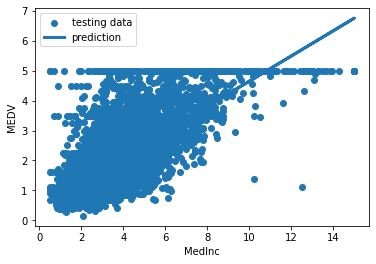

In [229]:
plt.scatter(X_test, Y_test,
label='testing data');

plt.plot(X_test, y_test_predicted,
label='prediction', linewidth=3)

plt.xlabel('MedInc'); plt.ylabel('MEDV')

plt.legend(loc='upper left')
plt.savefig("california model.png")
plt.show()

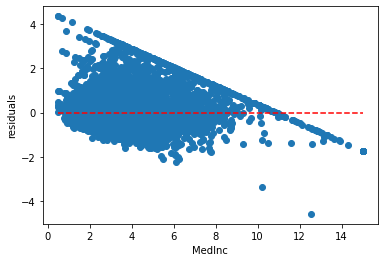

In [230]:
residuals = Y_test - y_test_predicted

# plot the residuals
plt.scatter(X_test, residuals)
# plot a horizontal line at y = 0
plt.hlines(y = 0,xmin = X_test.min(), xmax=X_test.max(), linestyle='--',color='r')

plt.xlabel('MedInc'); plt.ylabel('residuals')
plt.savefig("california residuals plot.png")
plt.show()

In [231]:
#each residual is near 0 it suggests a good fit. For example, the first five residuals in our model

print(residuals[:5])

[ 1.26118929 -0.34453578 -0.23295628 -0.16356786  0.32722598]


In [232]:
"""
Those are individual data points, 
how about the model performance for all data points? 
We need a way to aggregate the residuals and just report one number as the metric. 
It is natural to take the average of all residuals
"""

residuals.mean()

0.012510409380200807

In [233]:
"""
0.012510409380200807 is quite close to 0, but there’s a problem: 
residuals can be positive or negative so taking the average cancels them out. 
That’s not an accurate metric. To solve this, we take a square of each residual, 
then take the mean of squares. This is called mean squared error (MSE):
"""

print((residuals**2).mean())

#We can also use the mean_squared_error() method under scikit-learn metrics module to output the same result:

from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test, y_test_predicted))


0.7197365824767558
0.7197365824767558


In [234]:
type(Y_test)

numpy.ndarray

In [235]:
print("Descriptive Statistics:")
print("Count:", len(Y_test))
print("Minimum:", np.min(Y_test))
print("Maximum:", np.max(Y_test))
print("Mean:", np.mean(Y_test))
print("Standard Deviation:", np.std(Y_test))
print("Variance:", np.var(Y_test))
print("25th Percentile:", np.percentile(Y_test, 25))
print("50th Percentile (Median):", np.percentile(Y_test, 50))
print("75th Percentile:", np.percentile(Y_test, 75))

Descriptive Statistics:
Count: 6192
Minimum: 0.14999
Maximum: 5.00001
Mean: 2.076627592054263
Standard Deviation: 1.163286658870811
Variance: 1.3532358507068147
25th Percentile: 1.19875
50th Percentile (Median): 1.802
75th Percentile: 2.65625


In [236]:
"""
In general, the smaller the MSE, the better, 
yet there is no absolute good or bad threshold. 
We can define it based on the dependent variable, i.e., MEDV in the test set. 

california data :
Y_test ranges from 0.149 to 5.000 with a variance 1.353. Compared to the total variance, a MSE of 0.719 is not bad.

boston data :
Y_test ranges from 6.3 to 50 with a variance 92.26. Compared to the total variance, a MSE of 36.52 is not bad.

To make the scale of errors to be the same as the scale of targets, 
root mean squared error (RMSE) is often used. It is the square root of MSE.
"""

'\nIn general, the smaller the MSE, the better, \nyet there is no absolute good or bad threshold. \nWe can define it based on the dependent variable, i.e., MEDV in the test set. \n\ncalifornia data :\nY_test ranges from 0.149 to 5.000 with a variance 1.353. Compared to the total variance, a MSE of 0.719 is not bad.\n\nboston data :\nY_test ranges from 6.3 to 50 with a variance 92.26. Compared to the total variance, a MSE of 36.52 is not bad.\n\nTo make the scale of errors to be the same as the scale of targets, \nroot mean squared error (RMSE) is often used. It is the square root of MSE.\n'

In [237]:
#Another common metric to evaluate the model performance is called R-squared; one can calculate it via model.score():

model2.score(X_test,Y_test)

#It is the proportion of total variation explained by the model. Here, around 47% of variability in the testing data is explained by our model.

0.4681366281414826

In [238]:
"""
The total variation is calculated as the sum of squares of the difference 
between the response and the mean of response, in the example of testing data:
"""

print(((Y_test-Y_test.mean())**2).sum())

8379.236387576597


In [239]:
#Whereas the variation that the model fails to capture is computed as the sum of squares of residuals:

print((residuals**2).sum())

4456.608918696072


In [240]:
#Then the proportion of total variation from the data is:

1 - (((residuals**2).sum()) / (((Y_test-Y_test.mean())**2).sum()))

0.4681366281414826

In [241]:
"""
Comparing the two scenarios:

California Data :
Y_test ranges from 0.149 to 5.000.
The total variance is 1.353.
The MSE is 0.719.
The model's R-squared score (model.score(X_test, Y_test)) is 0.468.

Boston Data :
Y_test ranges from 6.3 to 50.
The total variance is 92.26.
The MSE is 36.52.
The model's R-squared score (model.score(X_test, Y_test)) is 0.602.

/////////////////////////////////////////////////////////

California Data :
The MSE of 0.719 indicates that the model's predictions have relatively low errors compared to the overall variability in the target variable.
The R-squared score of 0.468 suggests that the model explains approximately 46.8% of the variance in the target variable. This means that the model captures a moderate amount of the variability in the data.

Boston Data :
The MSE of 36.52 indicates that the model's predictions have relatively higher errors compared to the overall variability in the target variable.
The R-squared score of 0.602 suggests that the model explains approximately 60.2% of the variance in the target variable. This means that the model captures a relatively higher amount of the variability in the data compared to the California scenario.

***
Based on the MSE values and the R-squared scores, the model's performance in the Boston data scenario appears to be relatively better than the model's performance in the California data scenario. 
The lower MSE value and higher R-squared score in the Boston data scenario indicate that the model's predictions are closer to the actual values and explain a higher proportion of the variability in the target variable.
"""

"\nComparing the two scenarios:\n\nCalifornia Data :\nY_test ranges from 0.149 to 5.000.\nThe total variance is 1.353.\nThe MSE is 0.719.\nThe model's R-squared score (model.score(X_test, Y_test)) is 0.468.\n\nBoston Data :\nY_test ranges from 6.3 to 50.\nThe total variance is 92.26.\nThe MSE is 36.52.\nThe model's R-squared score (model.score(X_test, Y_test)) is 0.602.\n\n/////////////////////////////////////////////////////////\n\nCalifornia Data :\nThe MSE of 0.719 indicates that the model's predictions have relatively low errors compared to the overall variability in the target variable.\nThe R-squared score of 0.468 suggests that the model explains approximately 46.8% of the variance in the target variable. This means that the model captures a moderate amount of the variability in the data.\n\nBoston Data :\nThe MSE of 36.52 indicates that the model's predictions have relatively higher errors compared to the overall variability in the target variable.\nThe R-squared score of 0.602

In [242]:
import pyarabic.araby as araby
import pyarabic.number as number

text = u'الإسلام ديننا'

print(text)

الإسلام ديننا
